<a href="https://colab.research.google.com/github/Sak724/CSE437_Lab-Reports/blob/main/lab2_mdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Markov Decision Problems

# Exercise 1: Grid World
Compute the value funnction for the example 4.1 in the book.







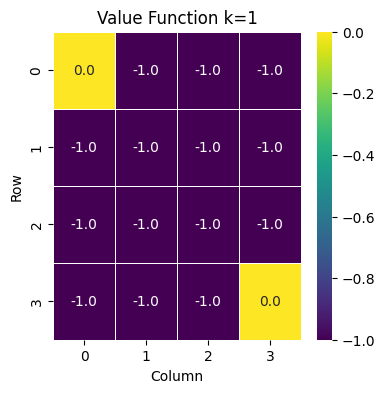

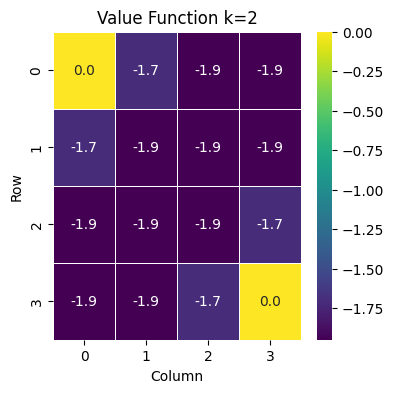

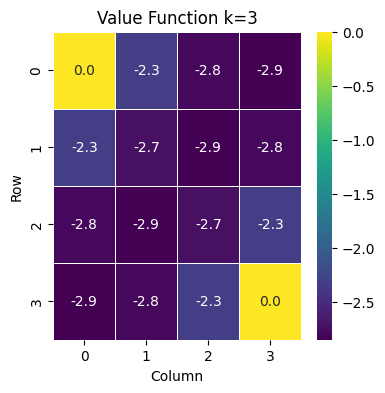

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


V = np.zeros(16)
gamma = 0.95 # Discount factor
V_old = np.zeros(16)

for k in range(3):
  for s in range(16):
    if s==0 or s==15:
      continue

    #### Write your code here #########
    r, c = divmod(s, 4)
    ns_up    = s if r == 0 else s - 4
    ns_right = s if c == 3 else s + 1
    ns_down  = s if r == 3 else s + 4
    ns_left  = s if c == 0 else s - 1

    V[s] = 0.25 * (
        (-1 + gamma * V_old[ns_up]) +
        (-1 + gamma * V_old[ns_right]) +
        (-1 + gamma * V_old[ns_down]) +
        (-1 + gamma * V_old[ns_left]))

  V_old = V.copy()

  ###### PLOT
  # Reshape the 1D value function array into an 8x8 grid
  V_grid = V.reshape((4, 4))

  # Plot the value function as a heatmap
  plt.figure(figsize=(4, 4))
  sns.heatmap(V_grid, annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
  plt.title("Value Function k=%d"%(k+1))
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.show()


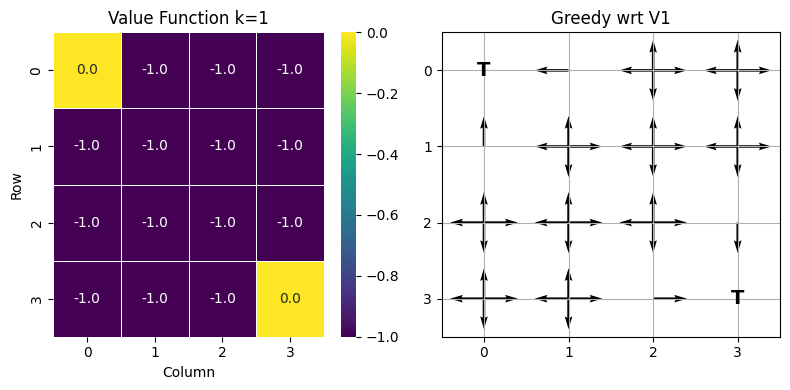

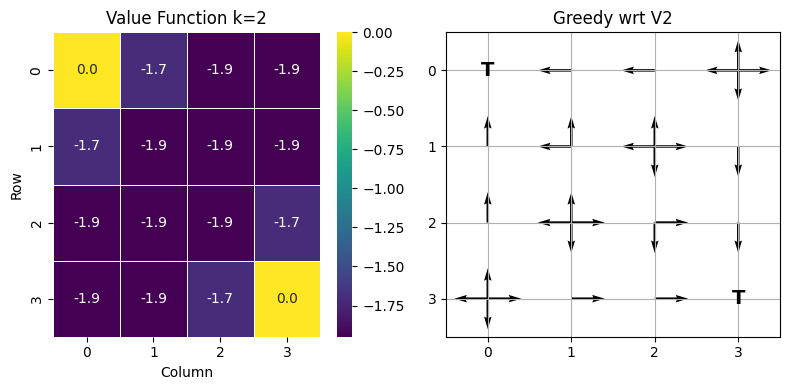

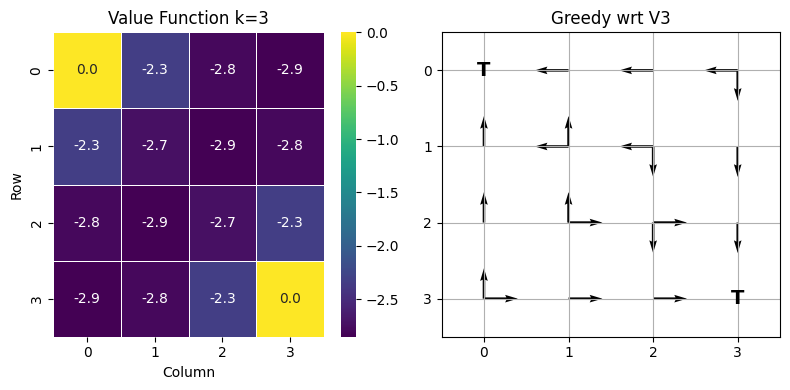

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

V = np.zeros(16)
gamma = 0.95 # Discount factor
V_old = np.zeros(16)

def nxt(s, a):
    r, c = divmod(s, 4)
    if a == 0: r = max(0, r-1)
    elif a == 1: c = min(3, c+1)
    elif a == 2: r = min(3, r+1)
    else:        c = max(0, c-1)
    return r*4 + c

dirs = {0:(0,-1), 1:(1,0), 2:(0,1), 3:(-1,0)}

for k in range(3):
  for s in range(16):
    if s == 0 or s == 15:
      continue
    acc = 0.0
    for a in range(4):
        s2 = nxt(s, a)
        acc += (-1 + gamma * V_old[s2])
    V[s] = acc / 4.0

  V_old = V.copy()

  V_grid = V.reshape((4, 4))


  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

  sns.heatmap(V_grid, annot=True, cmap="viridis", fmt=".1f", linewidths=.5, ax=ax1)
  ax1.set_title(f"Value Function k={k+1}")
  ax1.set_xlabel("Column")
  ax1.set_ylabel("Row")

  ax2.set_xlim(-0.5, 3.5); ax2.set_ylim(-0.5, 3.5)
  ax2.set_xticks(range(4)); ax2.set_yticks(range(4))
  ax2.invert_yaxis(); ax2.grid(True)

  for s in range(16):
    r, c = divmod(s, 4)
    if s in (0, 15):
        ax2.text(c, r, "T", ha="center", va="center", fontsize=14, fontweight="bold")
    else:
        q = np.array([-1 + gamma * V[nxt(s,a)] for a in range(4)])
        m = q.max()
        for a in [i for i in range(4) if abs(q[i]-m) < 1e-12]:
            dx, dy = dirs[a]
            ax2.quiver(c, r, dx*0.4, dy*0.4, angles='xy', scale_units='xy', scale=1)

  ax2.set_title(f"Greedy wrt V{k+1}")

  plt.tight_layout()
  plt.show()



# Exercise 2: Grid World
Compute the optimal policy




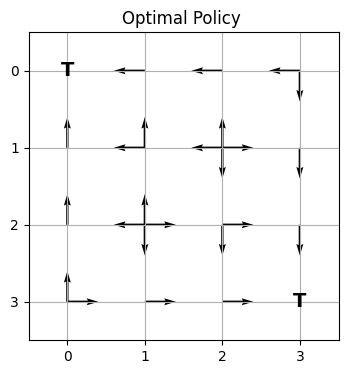

In [83]:
import numpy as np
import matplotlib.pyplot as plt

n = 4
S = n*n
A = 4
gamma = 0.95 # Discount factor
term = {0, 15}

def nxt(s, a):
    r, c = divmod(s, n)
    if a == 0: r = max(0, r-1)
    elif a == 1: c = min(n-1, c+1)
    elif a == 2: r = min(n-1, r+1)
    else:        c = max(0, c-1)
    return r*n + c

V = np.zeros(S)
theta = 1e-10
while True:
    delta = 0.0
    V_old = V.copy()
    for s in range(S):
        if s in term:
            continue
        q = [-1 + gamma * V_old[nxt(s,a)] for a in range(A)]
        V[s] = max(q)
        delta = max(delta, abs(V[s] - V_old[s]))
    if delta < theta:
        break

plt.figure(figsize=(4,4))
ax = plt.gca()
ax.set_xlim(-0.5, n-0.5); ax.set_ylim(-0.5, n-0.5)
ax.set_xticks(range(n)); ax.set_yticks(range(n))
ax.invert_yaxis(); ax.grid(True)

dirs = {0:(0,-1), 1:(1,0), 2:(0,1), 3:(-1,0)}
for s in range(S):
    r, c = divmod(s, n)
    if s in term:
        ax.text(c, r, "T", ha="center", va="center", fontsize=14, fontweight="bold")
    else:
        q = np.array([-1 + gamma * V[nxt(s,a)] for a in range(A)])
        m = q.max()
        for a in [i for i in range(A) if abs(q[i]-m) < 1e-12]:
            dx, dy = dirs[a]
            ax.quiver(c, r, dx*0.4, dy*0.4, angles='xy', scale_units='xy', scale=1)

plt.title("Optimal Policy ")
plt.show()



# Exercise 3: Grid World
In the following gym environment, compute the value function using Monte Carlo.

Run the following code in your local machine. You can run in on colab, but you will not see the animation.

In [69]:
## Install https://github.com/damat-le/gym-simplegrid
!pip install gym_simplegrid

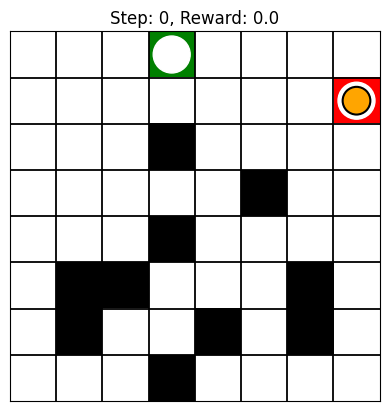

Location (0,7) t=0 reward=0.0
Location (0,7) t=1 reward=-1.0
Location (0,6) t=2 reward=0.0
Location (0,6) t=3 reward=-1.0
Location (0,6) t=4 reward=-1.0
Location (0,6) t=5 reward=-1.0
Location (0,5) t=6 reward=0.0
Location (0,4) t=7 reward=0.0
Location (0,4) t=8 reward=-1.0
Location (0,3) t=9 reward=1.0

Monte Carlo Value Function

 -1.8  -1.3  -0.3   0.0  -0.4  -1.5  -2.2  -2.6
 -2.1  -1.8  -1.2  -0.5  -1.3  -1.9  -2.5  -2.9
 -2.5  -2.4  -2.2   0.0  -2.5  -2.5  -3.0  -3.3
 -3.0  -3.0  -3.0  -3.3  -3.5   0.0  -3.7  -3.8
 -3.5  -3.3  -3.2   0.0  -4.4  -4.6  -4.2  -4.3
 -4.0   0.0   0.0  -5.3  -5.0  -5.0   0.0  -4.7
 -4.5   0.0  -5.7  -5.6   0.0  -5.2   0.0  -5.2
 -5.2  -5.5  -5.7   0.0  -5.6  -5.3  -5.7  -5.6


In [84]:
import gymnasium as gym
import gym_simplegrid
import numpy as np

START_LOC = 15
GOAL_LOC = 3
# Define the initial location and the goal location in the grid.
# Each grid cell has an a number from 0 to 63.
options = {
    'start_loc': START_LOC,
    'goal_loc': GOAL_LOC
}

env = gym.make('SimpleGrid-8x8-v0', render_mode='human')
obs, info = env.reset(seed=1, options=options)
done = env.unwrapped.done

for t in range(10):
    if done:
        break
    action = env.action_space.sample() # Random action
    obs, reward, done, _, info = env.step(action)
    grid_size = 8
    row = obs // grid_size
    col = obs % grid_size
    print("Location (", row, ",", col, ") t=", t, " reward=", reward, sep="")


grid_size = 8
S = grid_size * grid_size
gamma = 0.95

env_mc = gym.make('SimpleGrid-8x8-v0')

def run_episode(env, max_steps=500):
    obs, info = env.reset(options=options)
    episode = []
    done = False
    for _ in range(max_steps):
        if done:
            break
        a = env.action_space.sample()
        obs2, reward, terminated, truncated, info = env.step(a)
        episode.append((obs, reward))
        obs = obs2
        done = terminated or truncated
    return episode

V = np.zeros(S, dtype=float)
returns = {s: [] for s in range(S)}

episodes = 10000
for _ in range(episodes):
    ep = run_episode(env_mc)
    G = 0.0
    visited = set()
    for t in range(len(ep)-1, -1, -1):
        s_t, r_t = ep[t]
        G = gamma * G + r_t
        if s_t not in visited:
            visited.add(s_t)
            returns[s_t].append(G)
            V[s_t] = np.mean(returns[s_t])

V_grid = V.reshape((grid_size, grid_size))
print("\nMonte Carlo Value Function\n")
for row in V_grid:
    print(" ".join(f"{val:5.1f}" for val in row))
